<div style="border: 2px solid white; padding: 10px;">
    <h2 style='text-align: center; margin-top:5px'><u>Explained Variance and Cumulative Explained Variance</u></h2>
    <hr></hr>
    <ul>
        <li>
            <h4>Explained Variance:</h4>
            <pre style='line-height: 1.3'>
    Explained Variance introduces PCA(Principal Component Analysis) 
    which aims to reduce the dimensions of a dataset without losing the 
    information of the patterns and dispersion.
    The principle is to draw 'lines' that will capture the biggest variance
    in a dataset, each line is a new axis.
    It stars with PC1, which is the most spread axis of the dataset,
    then with PC2, which is the second most spread axis of the dataset,
    and so forth...
            </pre>
        </li>
        <li>
            <h4> Cumulative Explained Variance: </h4>
            <pre style='line-height: 1.3'>
    The Cumulative Explained Variance is much straightforward:
    It basically is the cumulative sum of all the PCs into a percentage 
    of the total variance. Kind of like we saw with the elbow
    method in clustering algorithm, the CEV help us to determine 
    how many PCs are needed to capture a significant 
    portion of variance (typically ~90%).
            </pre>
        </li>
</div>

In [79]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
df = pd.read_csv('../../subject/Knights/Train_Knight.csv')

Variances (Percentage):
 [4.48917596e+01 1.77912636e+01 9.67060568e+00 6.26842269e+00
 5.37204836e+00 3.73955136e+00 2.37591979e+00 1.82012117e+00
 1.38767075e+00 1.10970484e+00 1.02059677e+00 9.21235938e-01
 8.52230799e-01 7.13562872e-01 4.13084765e-01 3.04511906e-01
 2.71586688e-01 2.15161303e-01 1.85399684e-01 1.48042429e-01
 1.08631716e-01 1.04241449e-01 8.00248252e-02 7.60452896e-02
 5.50959514e-02 4.97445867e-02 2.57925354e-02 1.98906888e-02
 5.51592381e-03 2.16800508e-03 3.68038524e-04]
Cumulative Variances (Percentage):
 [ 44.89175956  62.68302319  72.35362887  78.62205156  83.99409992
  87.73365129  90.10957108  91.92969224  93.317363    94.42706783
  95.44766461  96.36890054  97.22113134  97.93469422  98.34777898
  98.65229089  98.92387757  99.13903888  99.32443856  99.47248099
  99.58111271  99.68535416  99.76537898  99.84142427  99.89652022
  99.94626481  99.97205734  99.99194803  99.99746396  99.99963196
 100.        ]


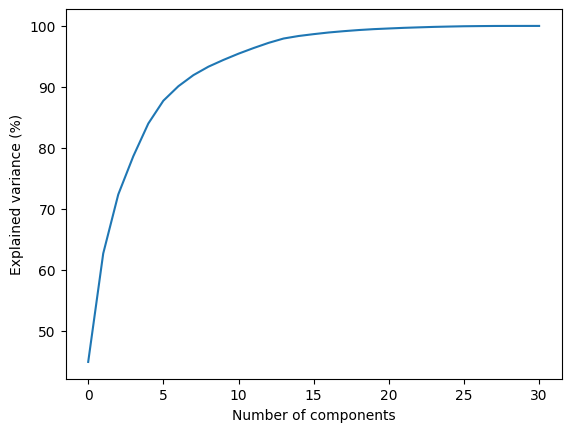

In [80]:
df['knight'] = df['knight'].map({'Jedi': 0, 'Sith': 1})

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA()
pca_trained = pca.fit_transform(df_scaled)

print('Variances (Percentage):\n', pca.explained_variance_ratio_ * 100)
print('Cumulative Variances (Percentage):\n', np.cumsum(pca.explained_variance_ratio_) * 100)
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.ylabel('Explained variance (%)')
plt.xlabel('Number of components')
plt.show()